[78990, 78990, 78990, 78990, 78990, 78990, 78990, 78990, 78990, 78990, 78990, 78889, 78738, 78511, 78170, 77659, 76899, 75777, 74141, 71796, 68518, 64091, 58383, 51449, 43608, 35431, 27590, 20656, 14948, 10521, 7243, 4898, 3262, 2140, 1380, 869, 528, 301, 150, 50, 40, 32, 25, 20, 16, 13, 10, 8, 6, 5]


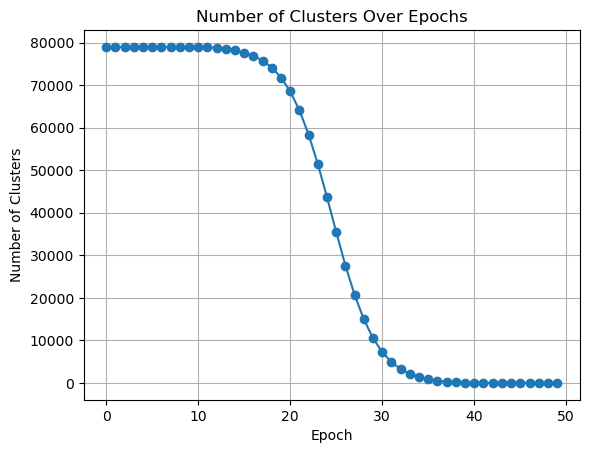

In [1]:
import numpy as np

def calculate_n_clusters(initial_n_clusters, final_n_clusters, final_n_clusters_2, epoch, k_means_start_epoch = 10, k_means_slow_epoch = 40):
    if epoch < k_means_start_epoch:
        # No change in number of clusters for the first L epochs
        return initial_n_clusters
    
    if k_means_start_epoch <= epoch < k_means_slow_epoch:
        
        adjusted_total_epochs = k_means_slow_epoch - k_means_start_epoch
        adjusted_epoch = epoch - k_means_start_epoch
        
        # Sigmoid function to control the rate of decrease
        x = np.linspace(-6, 6, adjusted_total_epochs)  # Spread over a range to adjust the curve
        sigmoid = 1 / (1 + np.exp(-x))

        # Normalize to get values between 0 and 1
        normalized_sigmoid = (sigmoid - sigmoid.min()) / (sigmoid.max() - sigmoid.min())

        # Invert and scale to get the number of clusters
        n_clusters = initial_n_clusters - normalized_sigmoid * (
            initial_n_clusters - final_n_clusters
        )
        
        return int(n_clusters[adjusted_epoch])
    
    else:
        # From P to total_epochs, decay by 0.9 per epoch
        n_clusters = int(final_n_clusters * (0.8 ** (epoch - k_means_slow_epoch + 1)))
        n_clusters = max(n_clusters, final_n_clusters_2)

        return n_clusters

# Testing the function
initial_n_clusters = 15800 * 5 - 10
final_n_clusters = 50
final_n_clusters_2 = 5
total_epochs = 50
k_means_start_epoch = 10
k_means_slow_epoch = 40

# Compute n_clusters for each epoch
n_clusters = [calculate_n_clusters(initial_n_clusters, final_n_clusters, final_n_clusters_2, epoch, k_means_start_epoch, k_means_slow_epoch) for epoch in range(total_epochs)]

# Print the result
print(n_clusters)

# Plot the result
import matplotlib.pyplot as plt
plt.plot(range(total_epochs), n_clusters, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters Over Epochs')
plt.grid(True)
plt.show()